In [1]:
import pretty_midi
import os
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

model = tf.keras.models.load_model('/Users/karansolanki/Desktop/ML Project/MOOSIK/model.h5')

In [3]:
def load_midi_files(folder_path):
    midi_data = []
    for file in os.listdir(folder_path):
        if file.endswith(".mid") or file.endswith(".midi"):
            midi_data.append(pretty_midi.PrettyMIDI(os.path.join(folder_path, file)))
    return midi_data

In [4]:
def extract_notes(midi_data):
    notes = []
    for midi in midi_data:
        for instrument in midi.instruments:
            if not instrument.is_drum:  
                for note in instrument.notes:
                    notes.append([note.start, note.end, note.pitch])
    return notes

In [5]:
def quantize_notes(notes, quantization_unit=0.25):
    quantized_notes = []
    for note in notes:
        start = round(note[0] / quantization_unit)
        end = round(note[1] / quantization_unit)
        pitch = note[2]
        quantized_notes.append([start, end, pitch])
    return quantized_notes


In [6]:
from tensorflow.keras.utils import to_categorical

def encode_notes(quantized_notes, sequence_length=100):
    input_sequences = []
    output_notes = []
    for i in range(len(quantized_notes) - sequence_length):
        sequence_in = quantized_notes[i:i + sequence_length]
        sequence_out = quantized_notes[i + sequence_length][2]  
        input_sequences.append(sequence_in)
        output_notes.append(sequence_out)
    
    X = np.array(input_sequences)
    y = np.array(output_notes)
    
    
    
    y = to_categorical(y, num_classes=128)
    
    return X, y


In [7]:
def build_gru_model(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.GRU(256, return_sequences=True))
    model.add(layers.GRU(256))
    model.add(layers.Dense(128, activation='softmax'))  # 128 possible MIDI notes
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [45]:
def plot_piano_roll(notes):
    piano_roll = np.zeros((128, max([note[1] for note in notes])))
    for note in notes:
        start, end, pitch = note
        piano_roll[pitch, start:end] = 1
    
    plt.imshow(piano_roll, aspect='auto', cmap='gray_r')
    plt.xlabel('Time (frames)')
    plt.ylabel('MIDI Pitch')
    plt.show()

In [54]:
def plot_binary_matrix(generated_notes):

    matrix = np.zeros((len(generated_notes), 128))

    for i, note in enumerate(generated_notes):
        pitch = note[2] 
 

        if 0 <= pitch < 128:
            matrix[i, pitch] = 1

    plt.matshow(matrix, cmap='gray_r')
    
    # Set the y-axis limit to go up to 100
    plt.ylim(0, 100)
    
    plt.xlabel('MIDI Pitch')
    plt.ylabel('Notes')
    plt.title('Binary Matrix of Generated Notes')
    plt.show()


In [10]:
def save_to_midi(generated_sequence, output_file='generated_music.mid'):
    midi = pretty_midi.PrettyMIDI()
    
    piano = pretty_midi.Instrument(program=0)

    for note_data in generated_sequence:
        start_time = note_data[0] * 0.25  # Multiply by quantization unit (adjust if needed)
        end_time = note_data[1] * 0.25    # Same here
        pitch = note_data[2]
        
    
        note = pretty_midi.Note(velocity=100, pitch=pitch, start=start_time, end=end_time)
        piano.notes.append(note)
    

    midi.instruments.append(piano)
    
    midi.write(output_file)
    print(f"MIDI file saved as {output_file}")

In [11]:
def generate_music(model, seed_sequence, num_steps):
    generated_sequence = seed_sequence.tolist()  
    
    for _ in range(num_steps):
        
        input_sequence = np.array([generated_sequence[-100:]])  
        prediction = model.predict(input_sequence)
        next_note = np.argmax(prediction, axis=-1)[0]  
        generated_sequence.append([0, 0, next_note])  
    
    return generated_sequence


In [12]:
folder_path = "midi_ke/mozart"  
midi_data = load_midi_files(folder_path)

In [13]:
notes = extract_notes(midi_data)

In [14]:
quantized_notes = quantize_notes(notes, quantization_unit=0.25)


In [15]:
X_train, y_train = encode_notes(quantized_notes, sequence_length=100)


In [19]:
random_index = random.randint(0, 50)
seed_sequence = X_train[random_index]


for row in seed_sequence:
    row[1] = row[0] + random.randint(8,30)
    print(seed_sequence)
    

    
    
    
generated_music = generate_music(model, seed_sequence, num_steps=500)

save_to_midi(generated_music, output_file='generated_music_2.mid')


[[ 0  9 70]
 [ 3  5 65]
 [ 5  8 62]
 [ 8  9 65]
 [ 9 12 70]
 [12 14 74]
 [14 17 77]
 [17 18 82]
 [18 18 74]
 [18 19 77]
 [19 20 75]
 [20 20 74]
 [20 21 72]
 [21 22 70]
 [22 23 69]
 [23 23 67]
 [23 24 65]
 [24 25 64]
 [25 26 65]
 [26 26 67]
 [26 27 69]
 [27 27 70]
 [28 28 72]
 [28 28 70]
 [28 28 69]
 [28 29 70]
 [29 29 72]
 [30 30 74]
 [31 31 75]
 [31 32 76]
 [32 33 77]
 [33 34 79]
 [34 34 77]
 [34 35 82]
 [35 36 74]
 [36 37 77]
 [37 37 75]
 [37 38 74]
 [38 39 72]
 [39 40 70]
 [40 40 69]
 [40 41 67]
 [41 42 65]
 [42 43 64]
 [42 43 65]
 [43 44 67]
 [44 45 69]
 [45 45 70]
 [46 47 70]
 [48 48 74]
 [49 51 70]
 [52 52 70]
 [52 53 72]
 [53 53 70]
 [53 54 69]
 [54 54 70]
 [54 55 79]
 [57 57 70]
 [57 57 72]
 [57 58 70]
 [58 58 69]
 [58 58 70]
 [58 60 77]
 [61 61 70]
 [61 62 72]
 [62 62 70]
 [62 63 69]
 [62 63 70]
 [63 64 72]
 [64 66 77]
 [66 67 75]
 [67 69 73]
 [69 70 74]
 [70 70 70]
 [71 71 72]
 [71 71 70]
 [71 72 69]
 [72 72 70]
 [72 73 79]
 [75 75 70]
 [75 75 72]
 [75 76 70]
 [76 76 69]
 [76

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

model = build_gru_model(X_train.shape[1:])
model.fit(X_train, y_train, epochs=5, batch_size=64)

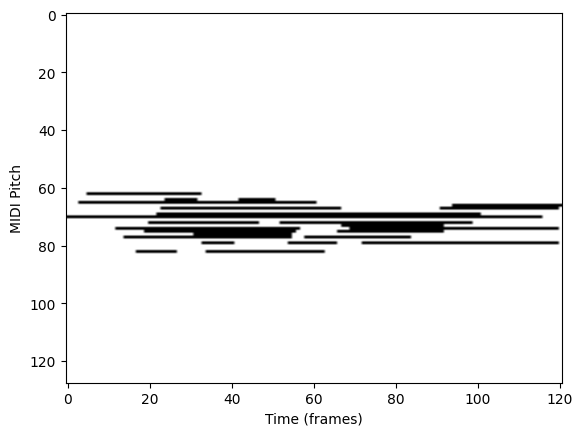

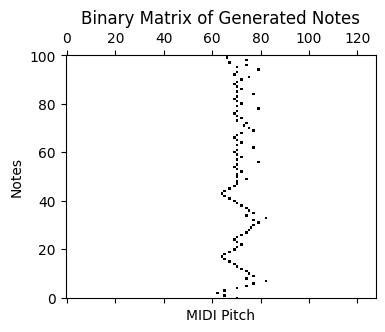

In [55]:
plot_piano_roll(generated_music)  # Piano roll visualization
plot_binary_matrix(generated_music)  # Binary matrix visualization

In [18]:
seed_sequence[1][1] = 0
# seed_sequence[1][1]


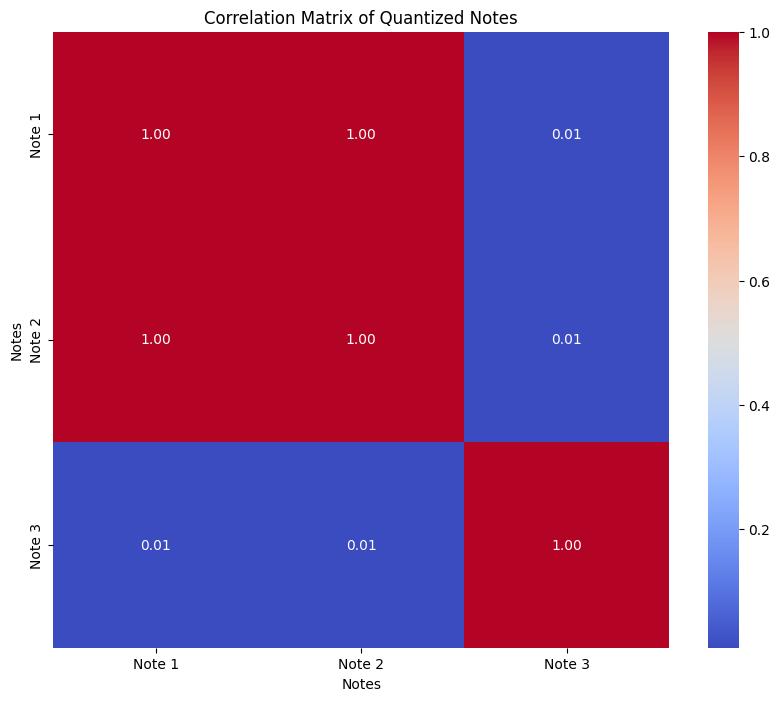

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `quantized_notes` contains your note data
# Convert to a NumPy array for correlation calculation
data_array = np.array(quantized_notes)

# Compute the correlation matrix
correlation_matrix = np.corrcoef(data_array, rowvar=False)

# Define labels for the heatmap (adjust these according to your data)
labels = [f'Note {i+1}' for i in range(data_array.shape[1])]  # Example labels

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            xticklabels=labels, yticklabels=labels)
plt.title("Correlation Matrix of Quantized Notes")
plt.xlabel("Notes")
plt.ylabel("Notes")
plt.show()

